In [1]:
!pip install fasteda

  Preparing metadata (setup.py) ... - done
  Created wheel for fasteda: filename=fasteda-1.0.0-py3-none-any.whl size=3966 sha256=99a392c81ab35b44fe9ca180bc1c359518e61d8edfc0adf1cae19b89d4eee1fa
  Stored in directory: /root/.cache/pip/wheels/c8/d0/0c/8163fa96254805787efd3e5663aa6eedc214a8e487ac7c99cd
Successfully built fasteda


In [2]:
from fasteda import fast_eda
import pyarrow.parquet as pq
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphing
import plotly.express as px #graphing
import seaborn as sns #graphing
import missingno as msno #describe data
import os

In [3]:
df = pd.read_csv("/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv")
train_meta = pq.ParquetFile('/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet')
it = train_meta.iter_batches()
train_meta = next(it).to_pandas()

In [4]:
fig = px.scatter_3d(df, x = "x", y = "y", z = "z", opacity = 0.8, color = "z")

fig.update_traces(marker = dict(size = 2, symbol = "diamond-open"))
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()

In [5]:
path = '/kaggle/input/icecube-neutrinos-in-deep-ice/train/'
# Loading 1st train parquet file
files = [file for idx, file in enumerate(os.listdir(path)) if file.endswith('.parquet') and idx < 1]
parquets = pd.concat([pd.read_parquet(path+file) for file in files])

In [6]:
parquets.shape

(32801416, 4)

In [7]:
eda = parquets.iloc[:1000].reset_index()
eda["auxiliary"] = eda["auxiliary"].astype(int)

DataFrame Head:


,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942


DataFrame Tail:


,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
65533,1,1066657,10170769,10170809,3.753414,1.691172
65534,1,1066666,10170810,10170908,5.940138,1.533735
65535,1,1066685,10170909,10170947,2.985077,1.926792


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(65536, 6)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   batch_id           65536 non-null  int64  
 1   event_id           65536 non-null  Int64  
 2   first_pulse_index  65536 non-null  int64  
 3   last_pulse_index   65536 non-null  int64  
 4   azimuth            65536 non-null  float64
 5   zenith             65536 non-null  float64
dtypes: Int64(1), float64(2), int64(3)
memory usage: 3.1 MB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
count,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000
mean,1.000000,533289.757950,5124457.889069,5124612.085419,3.146926,1.530891
std,0.000000,308061.806888,2923867.858743,2923865.785361,1.812414,0.687705
min,1.000000,24.000000,0.000000,60.000000,0.000266,0.005915
25%,1.000000,266519.500000,2622984.500000,2623027.750000,1.573667,1.002797
50%,1.000000,533041.000000,5222605.000000,5222675.500000,3.149317,1.525382
75%,1.000000,800752.500000,7754029.500000,7754113.000000,4.725530,2.047409
max,1.000000,1066685.000000,10170909.000000,10170947.000000,6.282986,3.132840


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



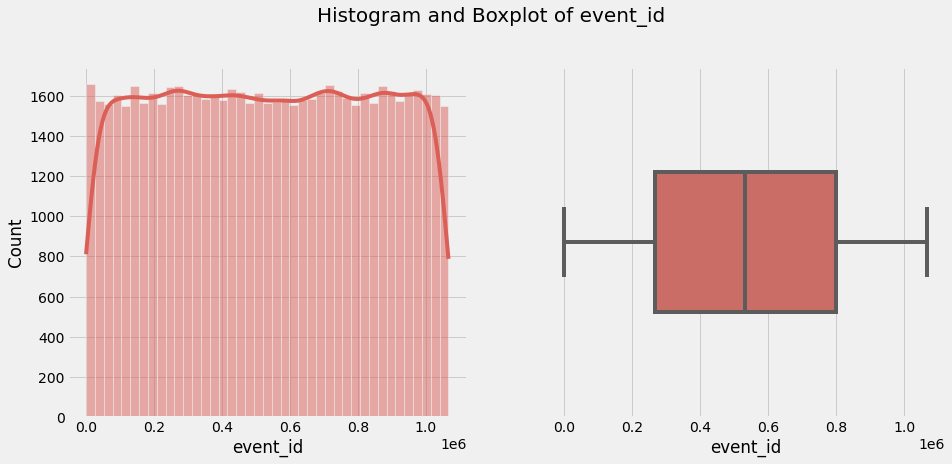

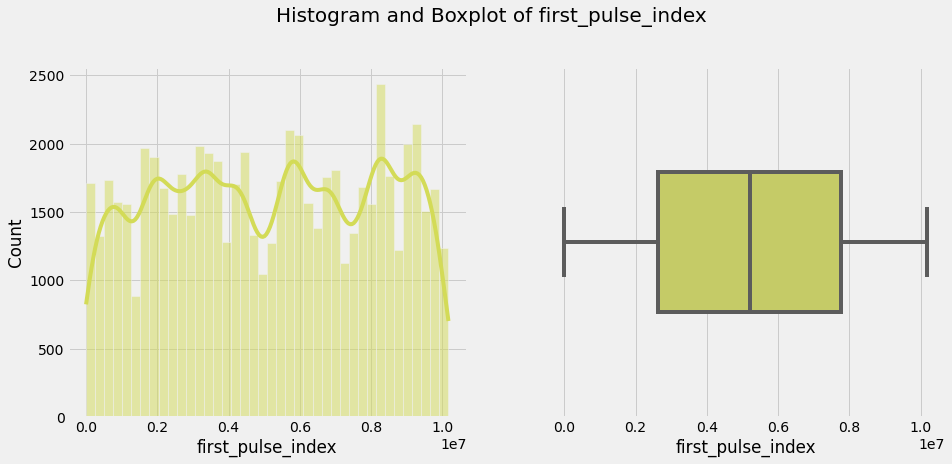

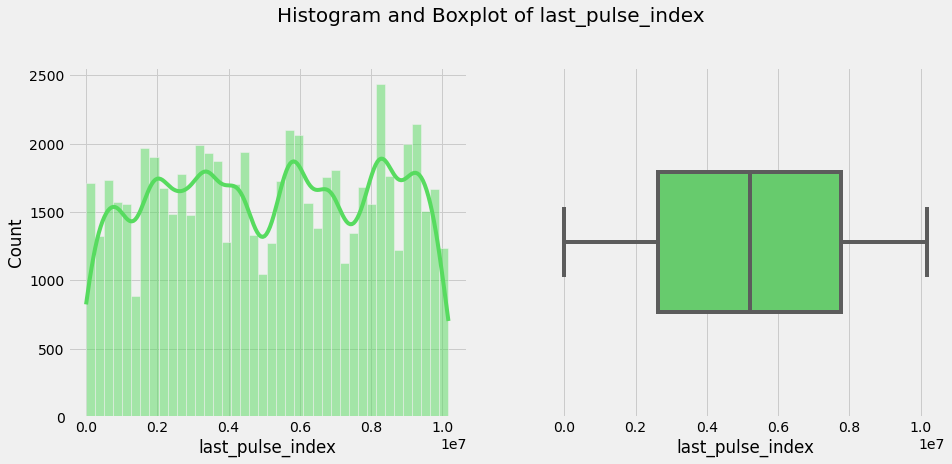

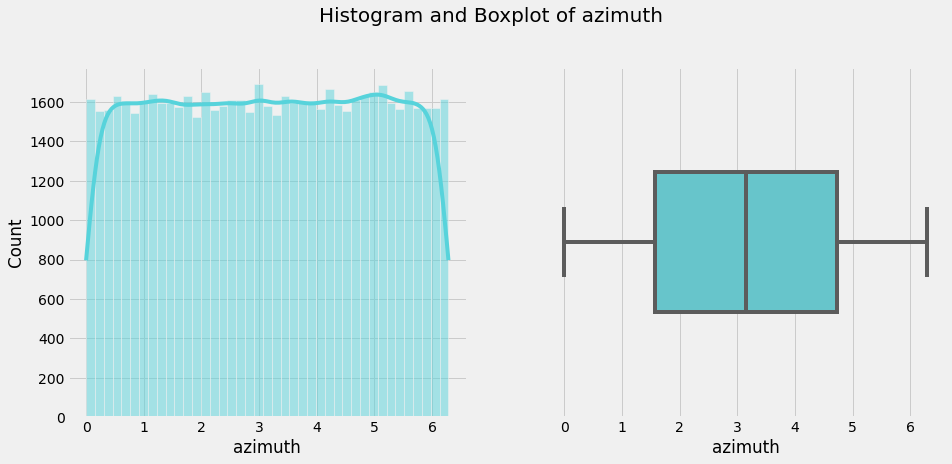

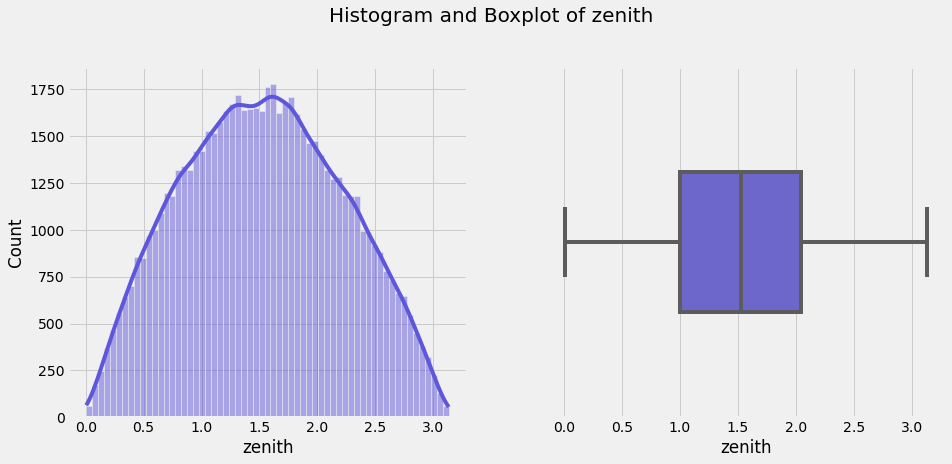

----------------------------------------------------------------------------------------------------
Countplot(s):



<Figure size 864x576 with 0 Axes>

In [8]:
# fasteda on batch of train_meta
fast_eda(train_meta, correlation = False, pairplot = False)

DataFrame Head:


,event_id,sensor_id,time,charge,auxiliary
0,777938857,2024,6029,1.425,1
1,777938857,2371,6078,1.475,1
2,777938857,920,6508,0.425,1


DataFrame Tail:


,event_id,sensor_id,time,charge,auxiliary
997,777939119,3801,29334,0.425,1
998,777939119,1868,29538,1.025,0
999,777939119,1342,29692,0.975,1


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1000, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   1000 non-null   int64  
 1   sensor_id  1000 non-null   int16  
 2   time       1000 non-null   int64  
 3   charge     1000 non-null   float64
 4   auxiliary  1000 non-null   int64  
dtypes: float64(1), int16(1), int64(3)
memory usage: 33.3 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,event_id,sensor_id,time,charge,auxiliary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,777938986.202000,2595.686000,12714.338000,0.951950,0.689000
std,84.720864,1478.281809,5131.375590,0.495032,0.463134
min,777938857.000000,16.000000,5893.000000,0.125000,0.000000
25%,777938910.000000,1307.750000,10028.000000,0.675000,0.000000
50%,777938998.000000,2669.500000,11443.500000,0.925000,1.000000
75%,777939035.000000,3792.500000,13932.000000,1.125000,1.000000
max,777939119.000000,5157.000000,37043.000000,7.325000,1.000000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



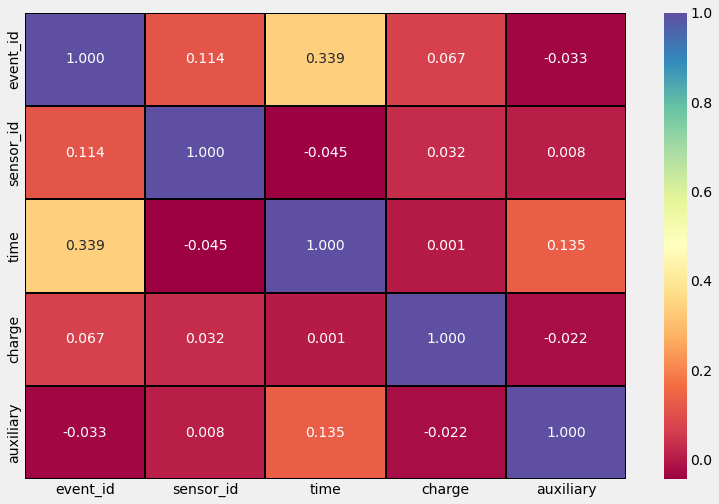

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



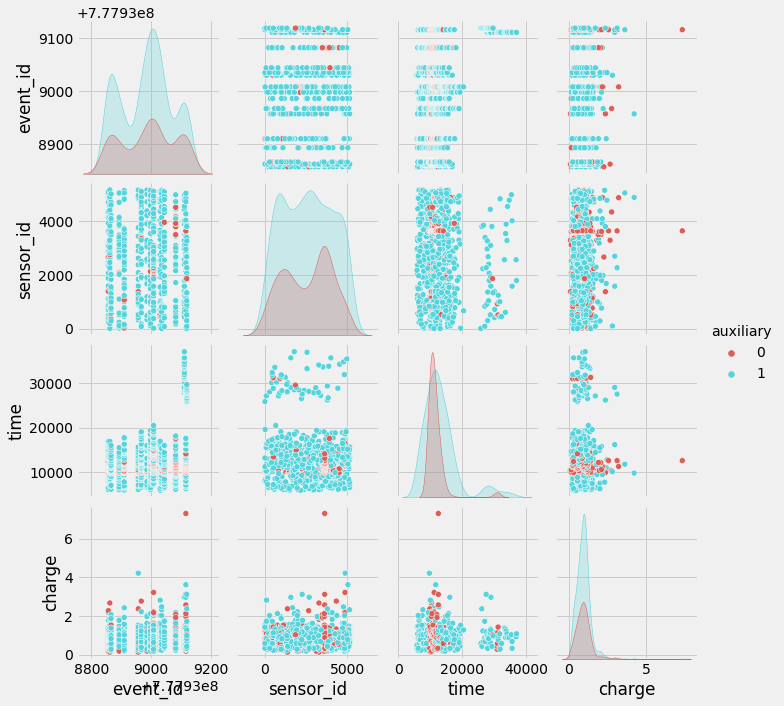

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



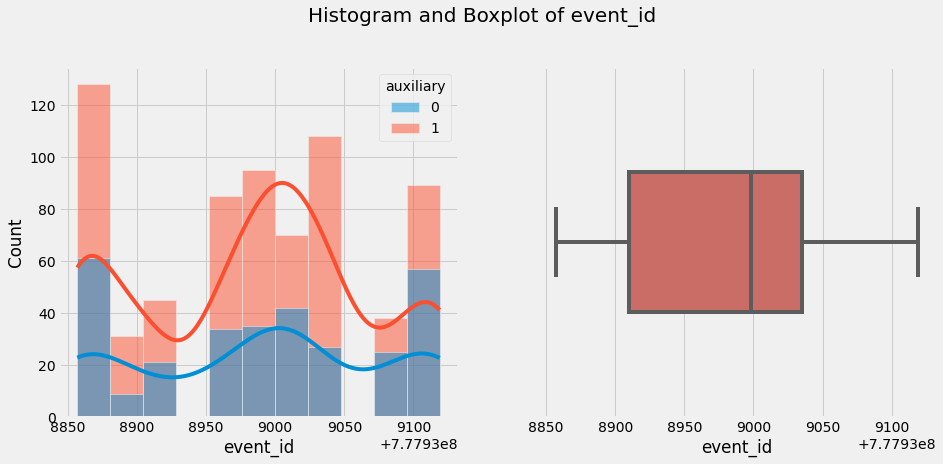

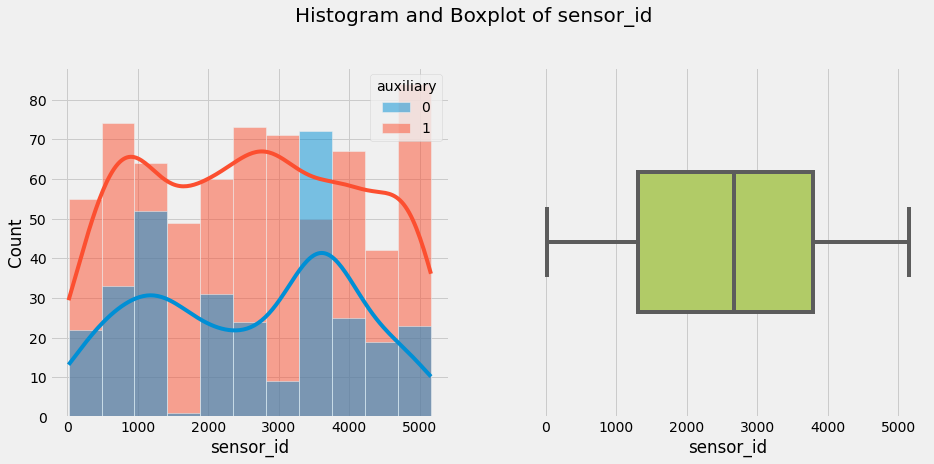

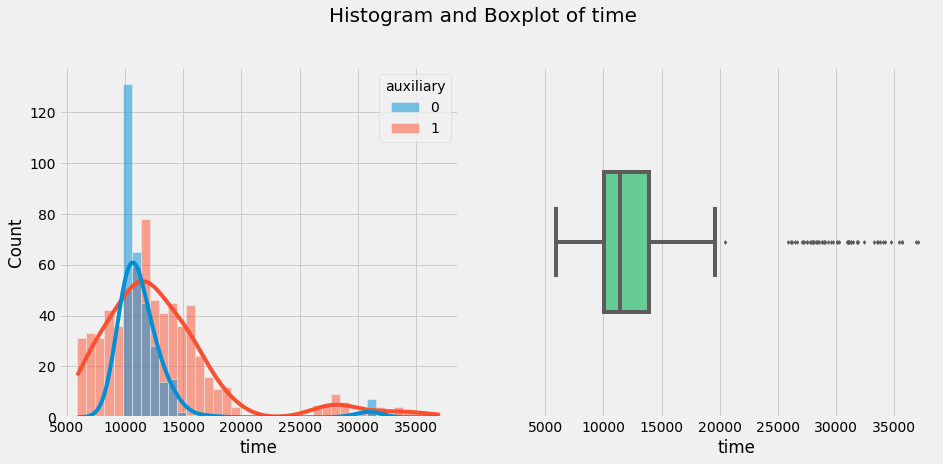

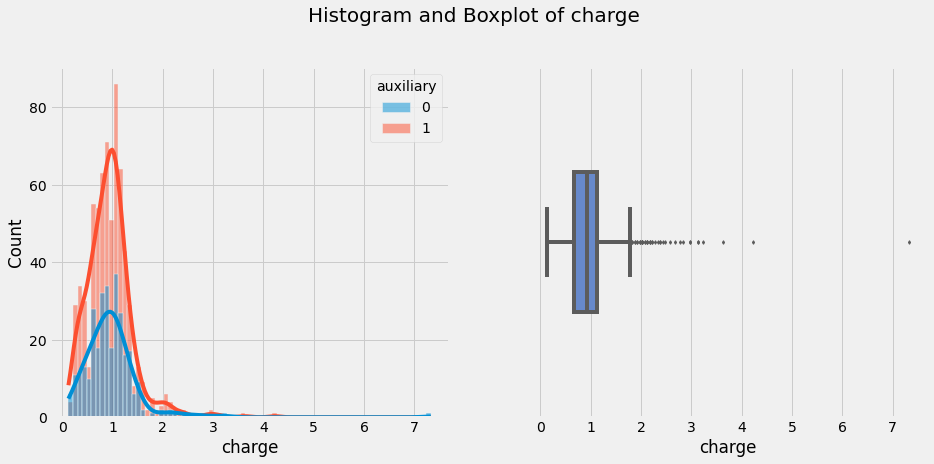

----------------------------------------------------------------------------------------------------
Countplot(s):



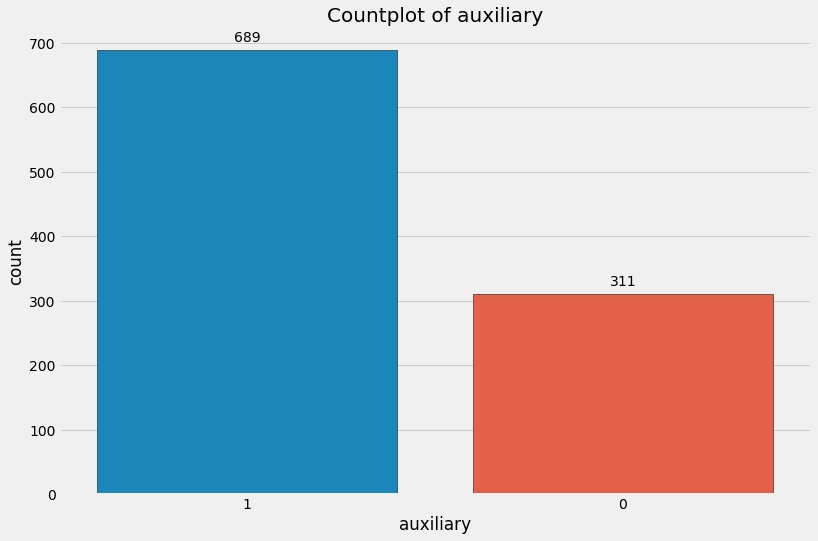

In [9]:
# fasteda on the first 1000 rows of train parquet file
fast_eda(eda, target = "auxiliary")